In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

The figure below shows the Google Maps tiles.  I am uncertain if the data used
to create that tile is open and/or available online.  We would like to plot
a Bay contour that looks like that, with the major rivers and islands.

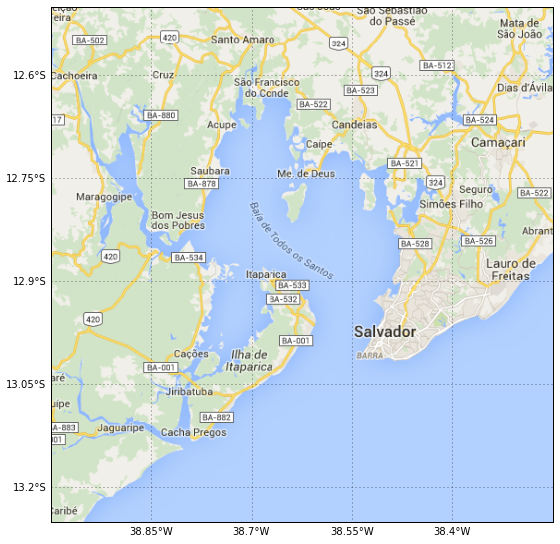

In [5]:
import cartopy.io.img_tiles as cimgt

extent = [-39, -38.25, -13.25, -12.5]

request = cimgt.GoogleTiles()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 10)

First lets try the
[Global Self-consistent, Hierarchical, High-resolution Geography Database (GSHHS)](http://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html).
The GSHHS is quite popular among oceanographers.  It was used in the MatlabTM
toolbox [m_map](http://www.eos.ubc.ca/~rich/map.html) and it is the default
choice in Python's [Basemap](http://matplotlib.org/basemap/).

However, I will use Cartopy instead of Basemap, that way I can use my custom
cut version of the fine resolution database.

Note: I always cut my Shapefiles around Brazil with GDAL for faster
interpolation and to save some disk space.  Here is the commando I use:

```bash
ogr2ogr -f "ESRI Shapefile" <output>.shp <input>.shp -clipsrc -82 -45 -32 10
```

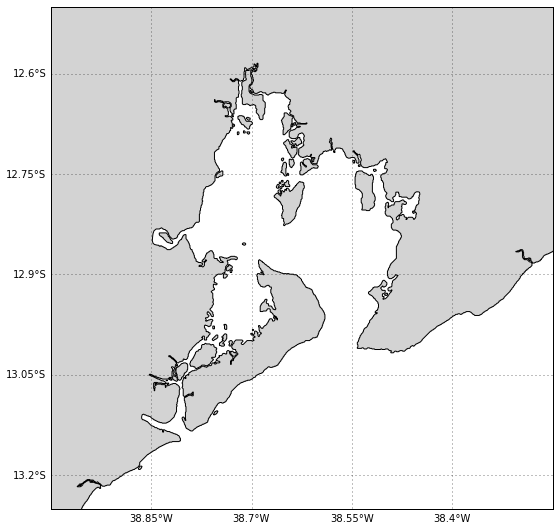

In [6]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./GSHHS/bts_GSHHS_f_L1')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')

I can see all the major islands, but the major rivers are all gone!  Lets
try Natural Earth instead (NE).  NE is the default choice in Cartopy, so I
will use Cartopy's `NaturalEarthFeature` do download the data.

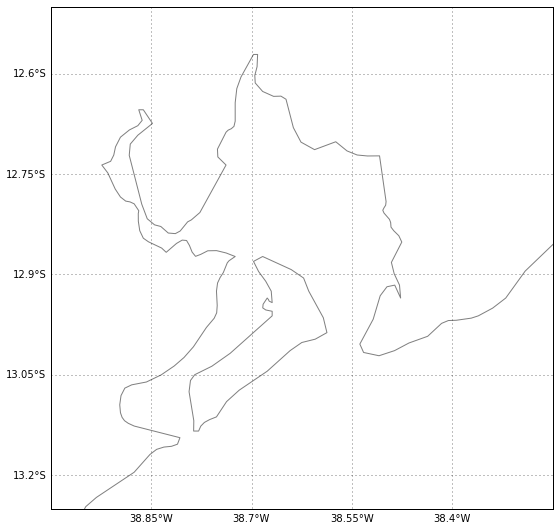

In [7]:
from cartopy.feature import NaturalEarthFeature

coast = NaturalEarthFeature(category='physical', scale='10m',
                             facecolor='none',
                             name='coastline')


fig, ax = make_map(projection=ccrs.PlateCarree())

ax.set_extent(extent)

feature = ax.add_feature(coast, edgecolor='gray')

Ouch!  NE is great for North America and Europe, but it sucks big time for
South America!

One thing I found out, while trying to find Google Maps data, was that
Open Street Maps data are easily available for
[download](http://openstreetmapdata.com/data).

They have the
[coastlines](http://data.openstreetmapdata.com/coastlines-split-4326.zip),
water,
[land](http://data.openstreetmapdata.com/land-polygons-complete-4326.zip),
and even Antarctic ice sheet polygons.

Lets test the coastline,

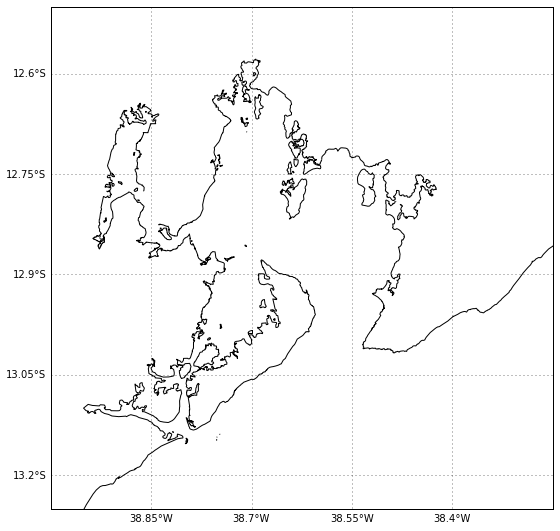

In [8]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./OSM_coastline/BTS')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='w',
                      edgecolor='black')

and land datasets.

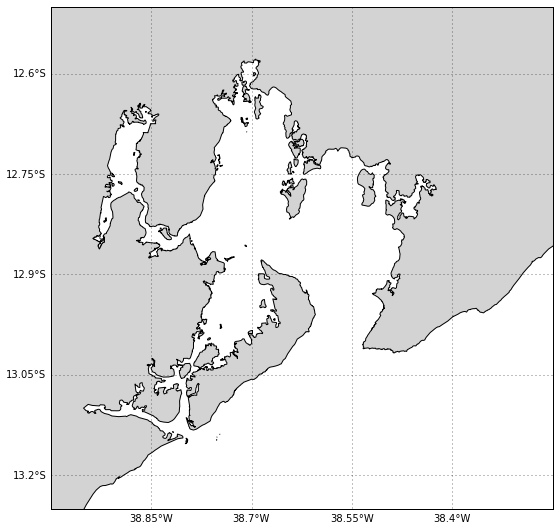

In [9]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./OSM_land/BTS')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')

Note that I purposely used white as the `facecolor` in the coastline dataset.
The OSM coastline data has some open lines and coloring the polygons would
produce a wacky image.  The land dataset looks OK tough, and it is the most
detailed so far!

OSM is the only set that shows Iguapé Bay (top left), but it is still lacking
the rivers contours.  I could not find any OSM river shapefile available for
download, but the OSM tile service is very similar do Google Maps and they do
display the rivers properly.

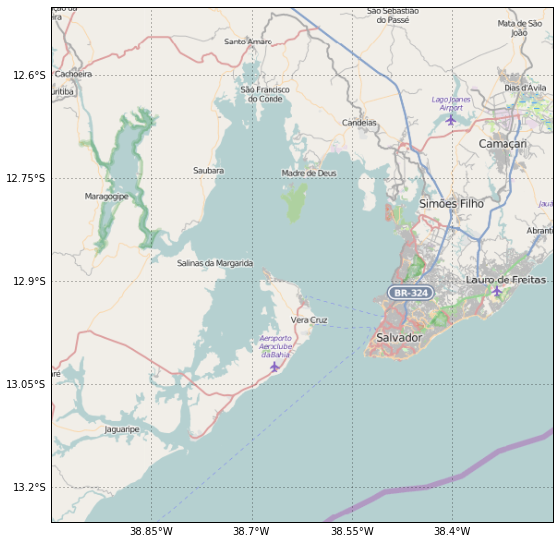

In [10]:
request = cimgt.OSM()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 10)

The sad part in this story is that I see high resolution datasets used in
papers published in the area, but unfortunately the data openness movement we
see everywhere is still in its infancy in Brazil...

-c:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


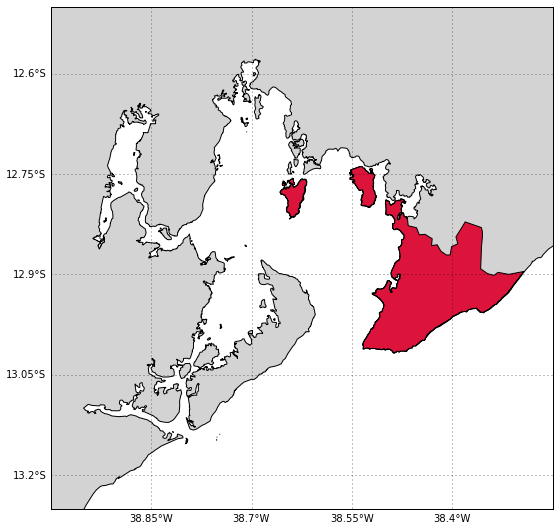

In [23]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./OSM_land/BTS')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
    
shp = shapereader.Reader('./BRA/BRA_adm2')
for record, geometry in zip(shp.records(), shp.geometries()):
    if record.attributes['NAME_2'].decode('latin-1') == 'Salvador':
      ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='crimson',
                        edgecolor='black')
    elif record.attributes['NAME_2'].decode('latin-1') == 'Camaçari':
      ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='Blue',
                        edgecolor='black')